# Jorge Bueno Perez & Noam Shmuel

# Text Mining and Social Media Mining, final project 
# Sentiment analysis performed on the transcripts and titles of youtube videos related to the game Cyberpunk 2077

# Importing packages and data:

In [1]:
import pandas as pd 
import numpy as np 
%matplotlib inline 
import json
import seaborn as sns
import nltk
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt 
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/Lajobu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
cyber= pd.read_csv("~/Desktop/Projects/Text mining/Audio analysis/cyberpunk.csv")

In [3]:
cyber.head()

,url,description,duration,views,transcript,rating,duration_min,is_liked
0,https://www.youtube.com/watch?v=0UiXx-_fL5U,Cyberpunk 2077 Review - The Best Unfinished Ga...,28:43,105676,[{'transcript': 'so I get a lot of questions a...,4.864700,28.72,1
1,https://www.youtube.com/watch?v=QcH9c_rJItE,Cyberpunk 2077 - Easy Allies Review,13:34,22384,"[{'transcript': ""how does cyberpunk 2077 on th...",4.870146,13.57,1
2,https://www.youtube.com/watch?v=QfpoTjUz1BY,Cyberpunk 2077 for Xbox One and PlayStation 4 ...,3:49,922825,"[{'transcript': ""this is a real blood of my cy...",4.836886,3.82,0
3,https://www.youtube.com/watch?v=FPzMhniHikQ,A Brutally Honest Review Of Cyberpunk 2077,10:36,18784,"[{'transcript': ""what is going on your nation ...",4.854014,10.60,1
4,https://www.youtube.com/watch?v=z1rUP17fayA,Cyberpunk 2077 PC Review (With New Gameplay),9:00,1306680,[{'transcript': 'what the what the hell are yo...,4.627821,9.00,0


In [4]:
cyber = cyber[['transcript', 'is_liked']].copy()

# 1) `Sentiment analysis`:

In [5]:
def print_sentiment_scores(sentence):
    snt = analyser.polarity_scores(sentence)  
    print("{:-<40} {}".format(sentence, str(snt)))

In [6]:
i=0 
compval= []

while (i<len(cyber)):
    k = analyser.polarity_scores(cyber.iloc[i]['transcript'])
    compval.append(k['compound'])
    i = i+1

compval = np.array(compval)

In [7]:
cyber['vader_score'] = compval

In [8]:
i = 0
predicted_value = [] 

while(i<len(cyber)):
    if ((cyber.iloc[i]['vader_score'] >= 0)):
        predicted_value.append(1)
        i = i+1
    elif ((cyber.iloc[i]['vader_score'] <= 0)):
        predicted_value.append(0)
        i = i+1

In [9]:
cyber['pred_sentiment'] = predicted_value

In [10]:
didntmakeit = cyber[cyber['is_liked'] != cyber['pred_sentiment']]

In [11]:
madeit = cyber[cyber['is_liked'] == cyber['pred_sentiment']]

In [12]:
len(madeit)/len(cyber)

0.4632352941176471

### 46.32% of the data was predicted correctly

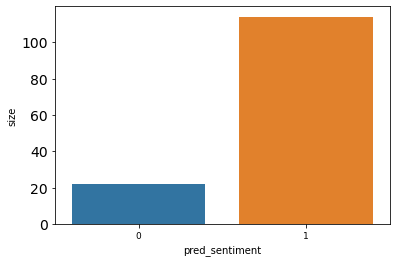

In [13]:
df= cyber.filter(['pred_sentiment']).groupby(['pred_sentiment'], as_index=False).size().sort_values(['pred_sentiment'], ascending= False)
plot = sns.barplot(x="pred_sentiment", y=str("size"), data= df,
            label="Total")
plot.tick_params(axis='x', labelsize=9)
plot.tick_params(axis='y', labelsize=14)

### As it can be seen in the graph, there are more videos predicted as `liked` than `not_liked`

# - `Not liked`:

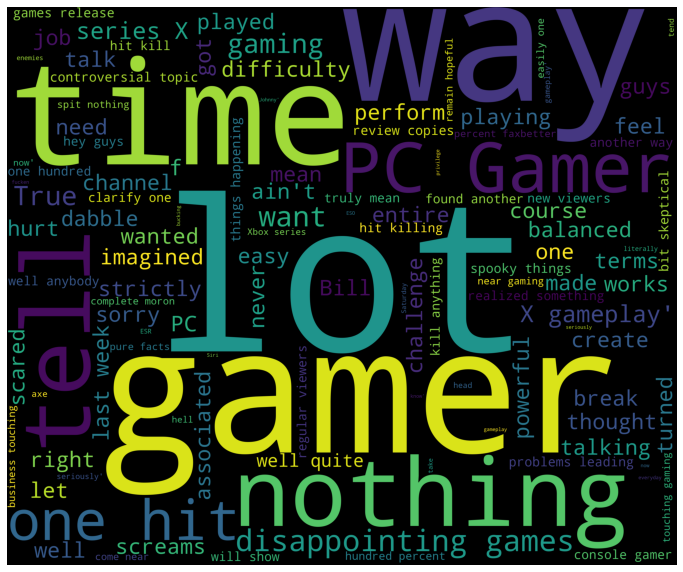

In [14]:
df = madeit[madeit['pred_sentiment']== 0] 

words = ' '.join(df['transcript'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
stopwords = set(STOPWORDS)

stopwords.add("cyberpunk")
stopwords.add("video")
stopwords.add("game")
stopwords.add("transcript'")
stopwords.add("know")
stopwords.add("going")
stopwords.add("confidence'")

wordcloud = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# - `Liked`:

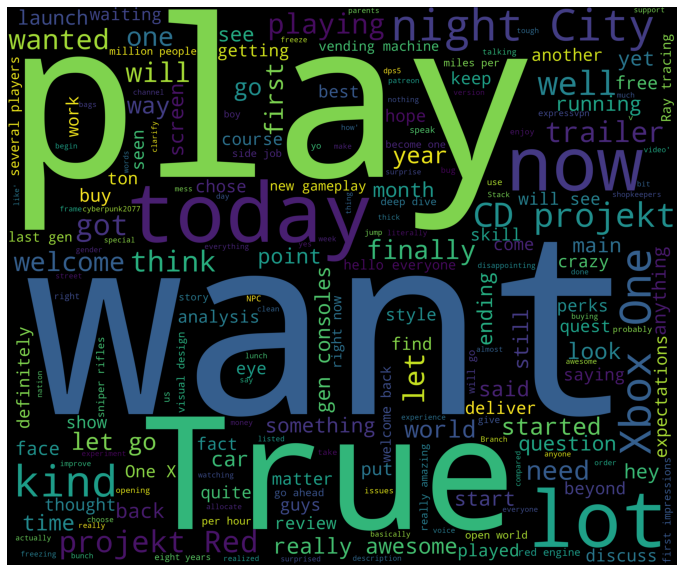

In [15]:
df = madeit[madeit['pred_sentiment']== 1] 

words = ' '.join(df['transcript'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
stopwords = set(STOPWORDS)

stopwords.add("cyberpunk")
stopwords.add("video")
stopwords.add("game")
stopwords.add("transcript'")
stopwords.add("know")
stopwords.add("going")
stopwords.add("confidence'")

wordcloud = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### For `transcript`, `not liked` it appears that the most common words are the following:
- `Gamer`
- `lot`
- `time`

### For `transcript`, `liked` it appears that the most common words are the following:
- `play`
- `want`
- `today`

# 2) Conclusions:

### - As presented before, there were not many transcripts predicted as `not liked`, hence it is slighty difficult to make a conclussion on this group. It seems that the most common words are really general. However, there are some words such as `PC` or `series x` related to the platform in which the game is played. It is possible that in this videos the creators were `criticizing` the differences between platforms, because the game was working much better on PC than in other plattforms. Additionally, the common word `disappointing games`supports the theory of the criticizion

### - On the other hand, for the transcripts with `liked`, it is easier to make a conclussion. The most common words are `play`, `want` and `today`, it could be something like `I want to play today`, something positive, and it appears that the viewers liked that. Furthermore, there is also the name of the company which created the game `CD projekt` and it is possible the people like to hear things from them

### However, `only 46.32% of de data was predicted correctly`, hence the `same analysis will be applied to the title of the video` (description in the dataset), because sometimes the title is a summary of the whole video, and maybe it would be possible to increase the percetage of correct predictions